In [53]:
# pandas, numpy 라이브러리 로드하기

import pandas as pd
import numpy as np

In [54]:
# file_name 변수에 read_html 로 저장한 파일명을 지정해 줍니다.
file_name = f"c:/data/cap/data.csv"
file_name

'c:/data/cap/data.csv'

In [55]:
# read_csv 로 csv 파일을 불러와 주세요.

df = pd.read_csv(file_name, encoding="utf-8")
df.shape

(92532, 8)

In [56]:
# "연번"을 기준으로 역순으로 정렬합니다.

df = df.sort_values(by="연번", ascending=False)

In [57]:
# head 로 미리보기를 합니다.

df.head()

,Unnamed: 0,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,0,92532,289256,2021-09-20,서초구,-,감염경로 조사중,NaN
1,1,92531,287537,2021-09-20,노원구,-,감염경로 조사중,NaN
2,2,92530,289090,2021-09-20,서초구,-,기타 확진자 접촉,NaN
3,3,92529,289021,2021-09-20,강서구,-,감염경로 조사중,NaN
4,4,92528,288931,2021-09-20,타시도,-,송파구 소재 시장 관련('21.9.),NaN


In [58]:
df.tail()

,Unnamed: 0,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
92527,95,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
92528,96,4,7,2020-01-30,마포구,중국,해외유입,퇴원
92529,97,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
92530,98,2,5,2020-01-30,중랑구,중국,해외유입,퇴원
92531,99,1,2,2020-01-24,강서구,중국,해외유입,퇴원


<AxesSubplot:title={'center':'한글 제목'}>

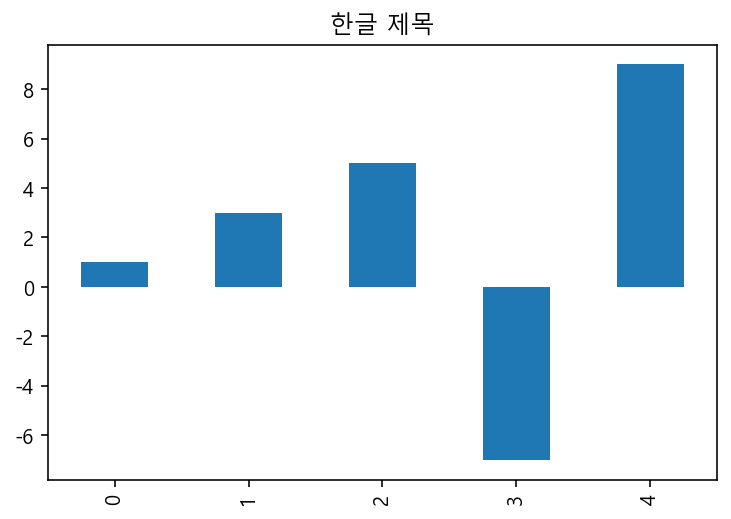

In [59]:
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic") # Windows
plt.rc("axes", unicode_minus=False) 

# test
pd.Series([1,3,5,-7,9]).plot.bar(title="한글 제목")

In [60]:
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 좀 더 선명해 보입니다.

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [61]:
# 확진일의 빈도수를 봅니다. 어느 날짜에 가장 많이 확진이 되었는지 봅니다.

df["확진일"].value_counts()

2021-09-14    808
2021-09-16    746
2021-09-18    742
2021-09-15    718
2021-09-17    703
             ... 
2020-04-30      1
2020-04-15      1
2020-04-24      1
2020-01-24      1
2020-04-18      1
Name: 확진일, Length: 574, dtype: int64

In [62]:
# "확진일" 컬럼의 데이터가 날짜 형태가 아니라 문자형태 입니다.

df["확진일"].head(1)

0    2021-09-20
Name: 확진일, dtype: object

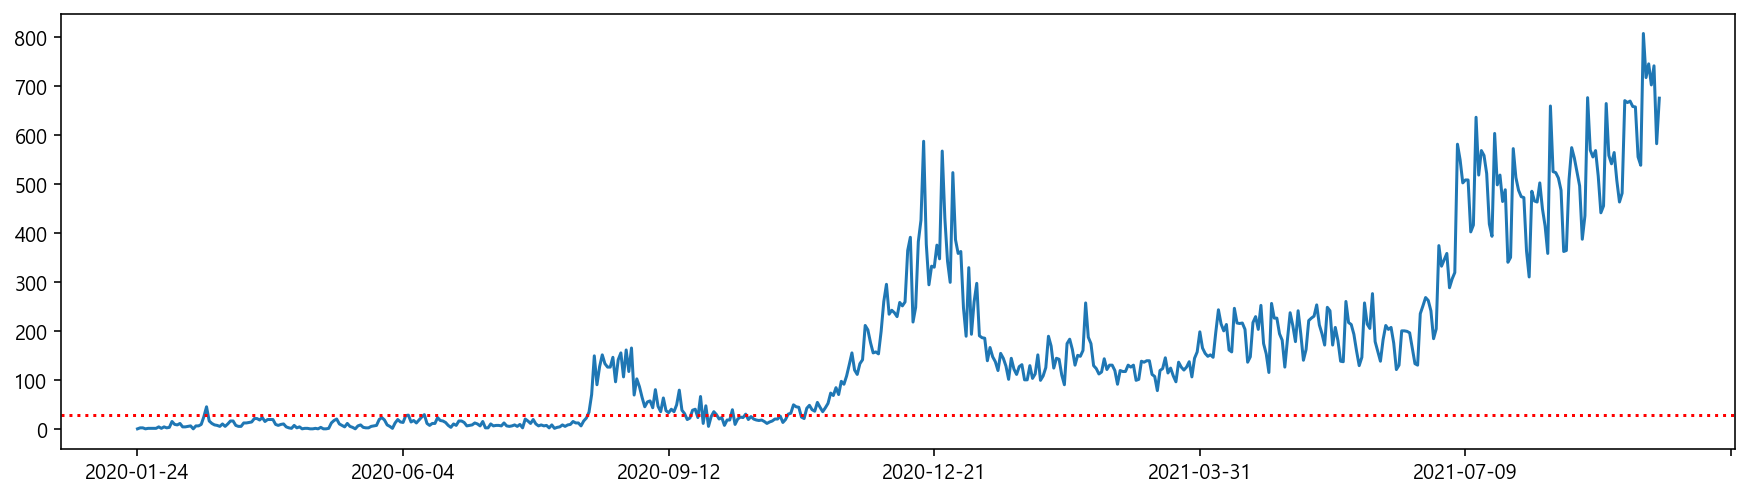

In [63]:
# 확진일자로 선그래프를 그립니다.

df["확진일"].value_counts().sort_index().plot(figsize=(15, 4))
plt.axhline(30, color="red", linestyle=":")

In [64]:
# 일자별 확진자수를 선그래프로 그립니다.
# 연도는 모두 2020년이기 때문에 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df["월일"] = df["확진일"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()
day_count.iloc[2]

330

In [65]:
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        print(i, case_count)

0 248
1 190
2 330
3 194
4 260
5 298
6 191
7 187
8 186
9 140
10 167
11 148
12 138
13 120
14 155
15 145
16 129
17 102
18 145
19 123
20 112
21 128
22 132
23 102
24 101
25 130
26 104
27 113
28 152
29 103
30 112
31 126
32 191
33 170
34 125
35 147
36 145
37 111
38 91
39 175
40 184
41 163
42 131
43 151
44 149
45 161
46 260
47 188
48 175
49 132
50 129
51 115
52 122
53 147
54 126
55 147
56 141
57 129
58 104
60 125
61 124
62 118
63 138
64 128
65 138
66 107
67 112
68 165
69 183
70 157
71 152
72 121
73 116
74 85
75 131
76 130
77 157
78 132
79 142
80 117
81 103
82 143
83 140
84 134
85 141
86 153
87 129
88 167
89 177
90 223
91 182
92 175
93 169
94 172
95 157
96 206
97 254
98 226
99 206
100 217
101 164
102 166
103 250
104 222
105 217
106 219
107 206
108 138
109 149
110 218
111 232
112 204
113 253
114 176
115 154
116 116
117 261
118 227
119 227
120 196
121 183
122 129
123 184
124 238
125 212
126 179
127 242
128 208
129 159
130 184
131 233
132 235
133 236
134 266
135 219
136 199
137 173
138 256
139 251

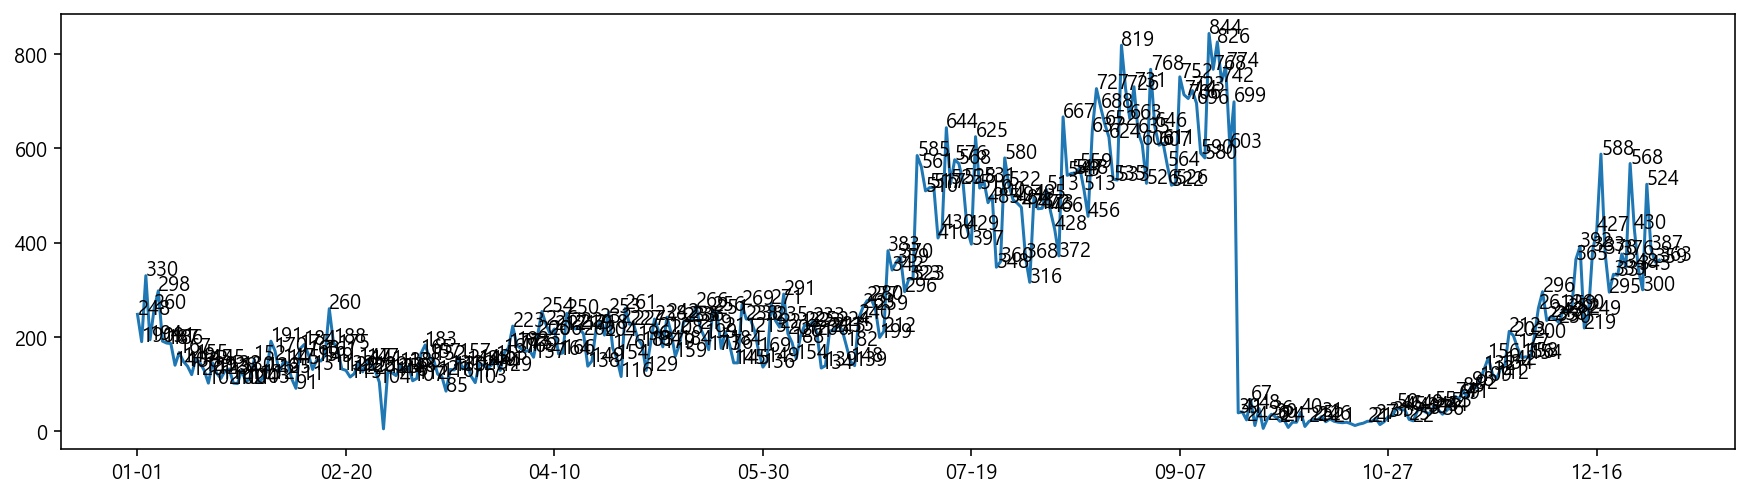

In [66]:
g = day_count.plot(figsize=(15, 4))
for i in range(len(day_count)):
    case_count = day_count.iloc[i]
    if case_count > 20:
        g.text(x=i, y=case_count, s=case_count)

In [67]:
day_count

01-01    248
01-02    190
01-03    330
01-04    194
01-05    260
        ... 
12-27    300
12-28    524
12-29    387
12-30    359
12-31    363
Name: 월일, Length: 366, dtype: int64

In [68]:
# describe 를 통해 일자별 확진자수를 describe를 통해 요약해 봅니다.

day_count.describe()

count    366.000000
mean     252.819672
std      196.703407
min        5.000000
25%      128.000000
50%      189.000000
75%      348.000000
max      844.000000
Name: 월일, dtype: float64

In [69]:
# 확진자가 가장 많았던 날을 찾습니다.

day_count[day_count == day_count.max()]

09-14    844
Name: 월일, dtype: int64

In [70]:
# 확진자가 가장 많았던 날의 발생이력을 찾습니다.

df[df["월일"] == "09-14"].head()


,Unnamed: 0,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월일
4168,68,88364,277941,2021-09-14,구로구,-,기타 확진자 접촉,NaN,09-14
4169,69,88363,277989,2021-09-14,타시도,-,감염경로 조사중,퇴원,09-14
4170,70,88362,277741,2021-09-14,구로구,-,기타 확진자 접촉,NaN,09-14
4171,71,88361,277603,2021-09-14,타시도,-,타시도 확진자 접촉,NaN,09-14
4172,72,88360,277598,2021-09-14,구로구,-,감염경로 조사중,NaN,09-14


<AxesSubplot:>

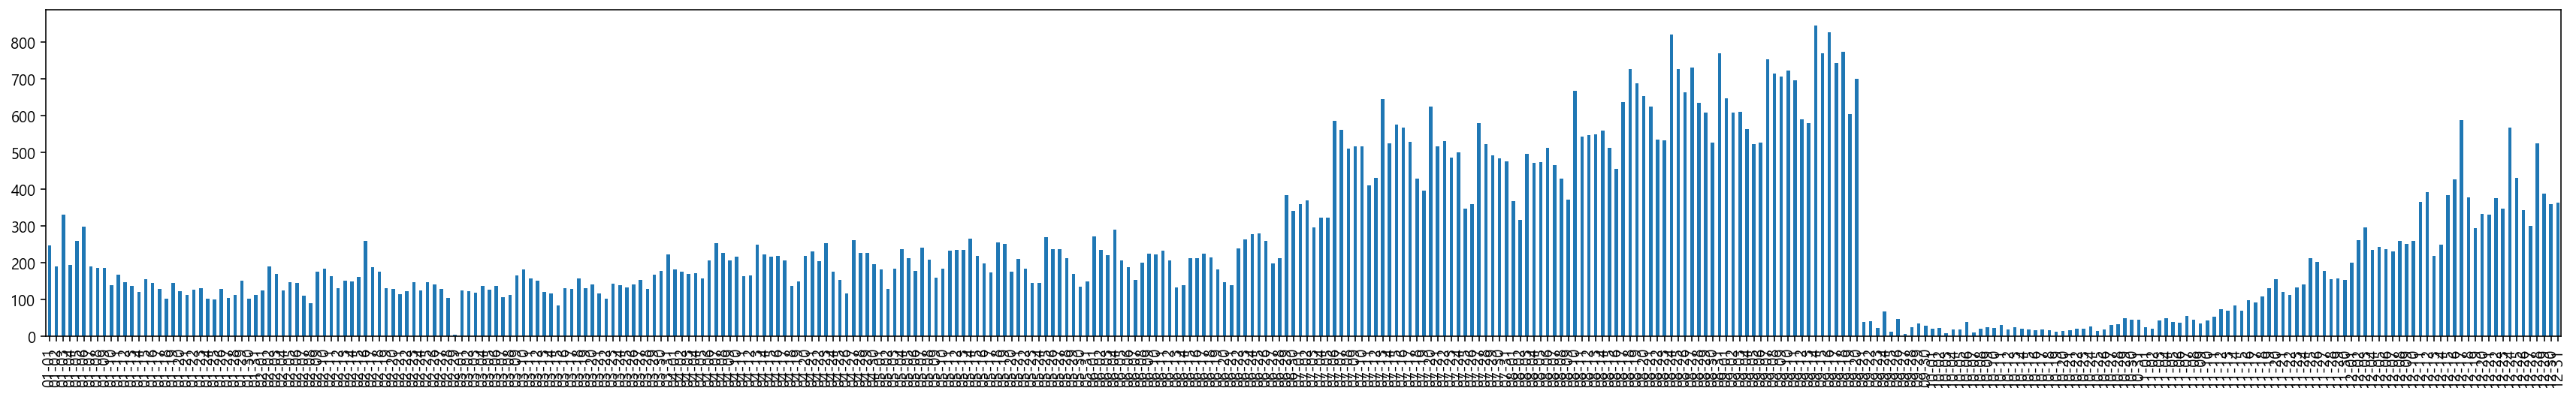

In [71]:
# 선그래프로 그렸던 그래프를 막대그래프로 그립니다.

day_count.plot.bar(figsize=(30, 4))

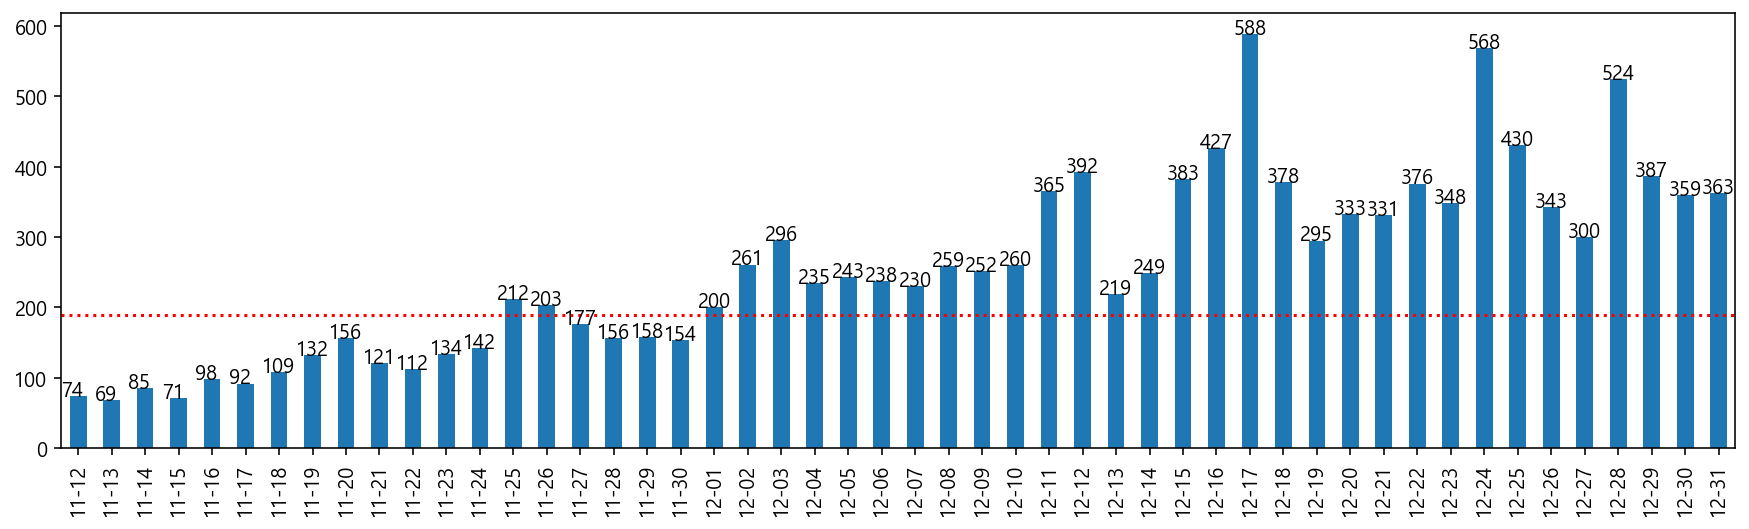

In [72]:
# 슬라이싱을 통해 최근 데이터만 그립니다.

g = day_count[-50:].plot.bar(figsize=(15, 4))
g.axhline(day_count.median(), linestyle=":", color="red")

for i in range(50):
    case_count = day_count[-50:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.5, y=case_count, s=case_count)

In [74]:
df

,Unnamed: 0,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황,월일,년,월,주
0,0,92532,289256,2021-09-20,서초구,-,감염경로 조사중,NaN,09-20,2021,9,38
1,1,92531,287537,2021-09-20,노원구,-,감염경로 조사중,NaN,09-20,2021,9,38
2,2,92530,289090,2021-09-20,서초구,-,기타 확진자 접촉,NaN,09-20,2021,9,38
3,3,92529,289021,2021-09-20,강서구,-,감염경로 조사중,NaN,09-20,2021,9,38
4,4,92528,288931,2021-09-20,타시도,-,송파구 소재 시장 관련('21.9.),NaN,09-20,2021,9,38
...,...,...,...,...,...,...,...,...,...,...,...,...
92527,95,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,01-31,2020,1,5
92528,96,4,7,2020-01-30,마포구,중국,해외유입,퇴원,01-30,2020,1,5
92529,97,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,01-30,2020,1,5
92530,98,2,5,2020-01-30,중랑구,중국,해외유입,퇴원,01-30,2020,1,5


In [75]:
df["확진일"] = pd.to_datetime(df["확진일"])
df["년"] = df["확진일"].dt.year
df["월"] = df["확진일"].dt.month
df["주"] = df["확진일"].dt.week

# test
df[["확진일", "년", "월", "주"]]

<ipython-input-75-6f7bd527ed0e>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일"].dt.week


,확진일,년,월,주
0,2021-09-20,2021,9,38
1,2021-09-20,2021,9,38
2,2021-09-20,2021,9,38
3,2021-09-20,2021,9,38
4,2021-09-20,2021,9,38
...,...,...,...,...
92527,2020-01-31,2020,1,5
92528,2020-01-30,2020,1,5
92529,2020-01-30,2020,1,5
92530,2020-01-30,2020,1,5


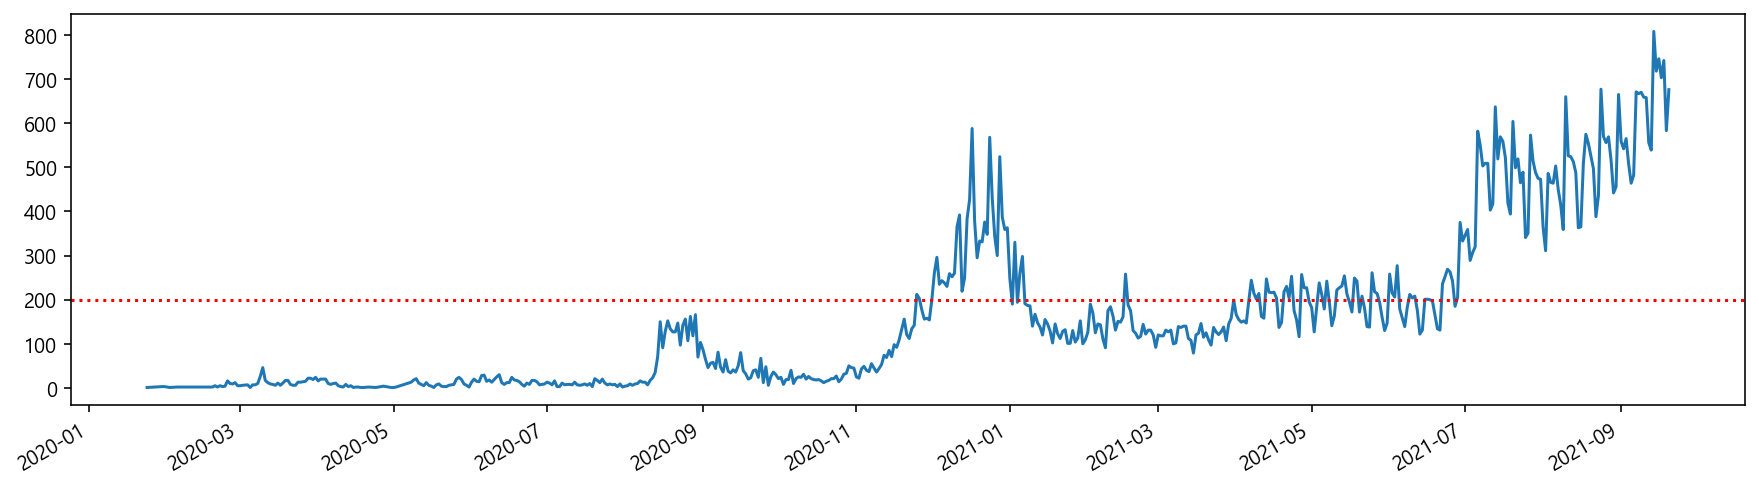

In [76]:
df["확진일"].value_counts().sort_index().plot(figsize=(15,4))
plt.axhline(200, color='red', linestyle=":")

In [77]:
day_count = df["확진일"].value_counts().sort_index()
day_count[day_count == day_count.max()]
day_count

2020-01-24      1
2020-01-30      3
2020-01-31      3
2020-02-02      1
2020-02-05      2
             ... 
2021-09-16    746
2021-09-17    703
2021-09-18    742
2021-09-19    583
2021-09-20    676
Name: 확진일, Length: 574, dtype: int64

<AxesSubplot:>

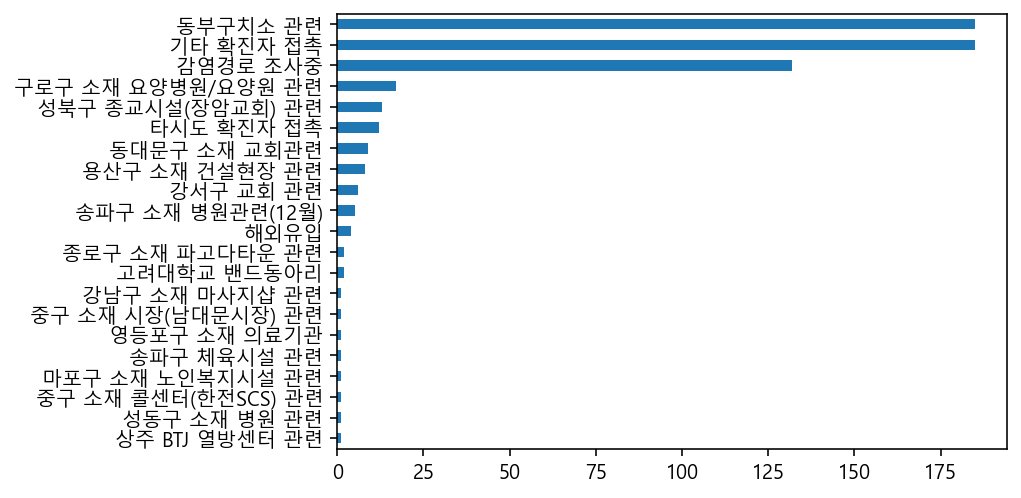

In [78]:
df[df["확진일"]=='2020-12-17']["접촉력"].value_counts().sort_values().plot.barh()

<AxesSubplot:xlabel='월'>

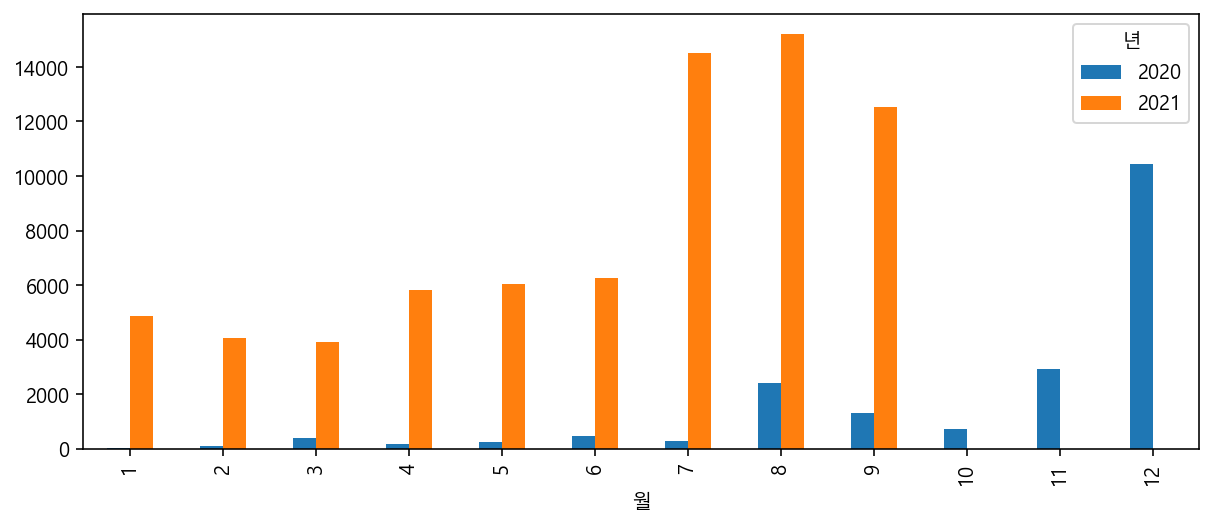

In [79]:
df.groupby(["월", "년"])["연번"].count().unstack().plot.bar(figsize=(10,4))

In [84]:
first_day = df.iloc[-1, 3]
last_day = df.iloc[0, 3]
days = pd.date_range(first_day, last_day)
df_days = pd.DataFrame({"확진일자": days})
df_days

,확진일자
0,2020-01-24
1,2020-01-25
2,2020-01-26
3,2020-01-27
4,2020-01-28
...,...
601,2021-09-16
602,2021-09-17
603,2021-09-18
604,2021-09-19


In [87]:
daily_case = df["확진일"].value_counts()
df_daily_case = daily_case.to_frame()
df_daily_case.columns = ["확진수"]
df_daily_case

,확진수
2021-09-14,808
2021-09-16,746
2021-09-18,742
2021-09-15,718
2021-09-17,703
...,...
2020-05-01,1
2020-04-24,1
2020-01-24,1
2020-04-15,1


In [88]:
all_days = df_days.merge(df_daily_case, left_on="확진일자", right_index=True, how='left')
all_days

,확진일자,확진수
0,2020-01-24,1.0
1,2020-01-25,NaN
2,2020-01-26,NaN
3,2020-01-27,NaN
4,2020-01-28,NaN
...,...,...
601,2021-09-16,746.0
602,2021-09-17,703.0
603,2021-09-18,742.0
604,2021-09-19,583.0


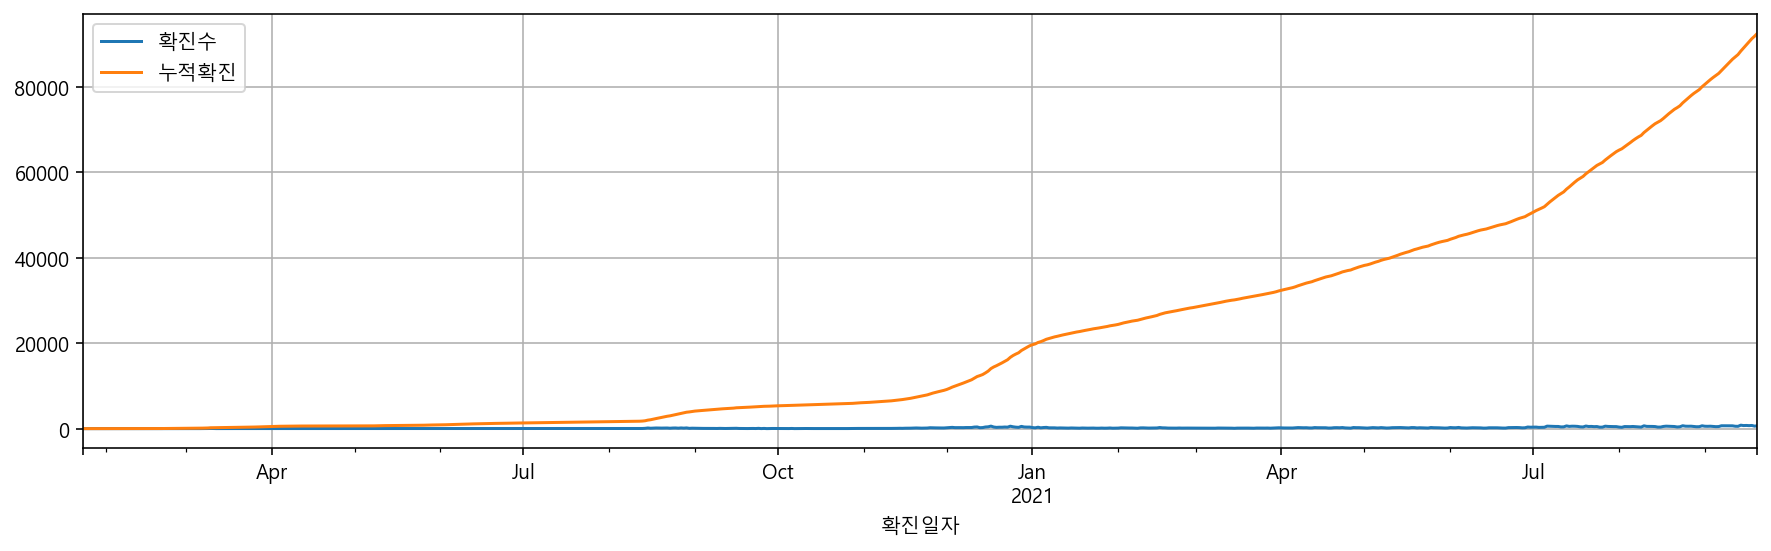

In [89]:
all_days["확진수"] = all_days["확진수"].fillna(0)
all_days["누적확진"] = all_days["확진수"].cumsum()
cum_day = all_days.set_index("확진일자")

# 시각화
cum_day.plot(figsize=(15,4))
plt.grid(True)

C:\Users\kimjm\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


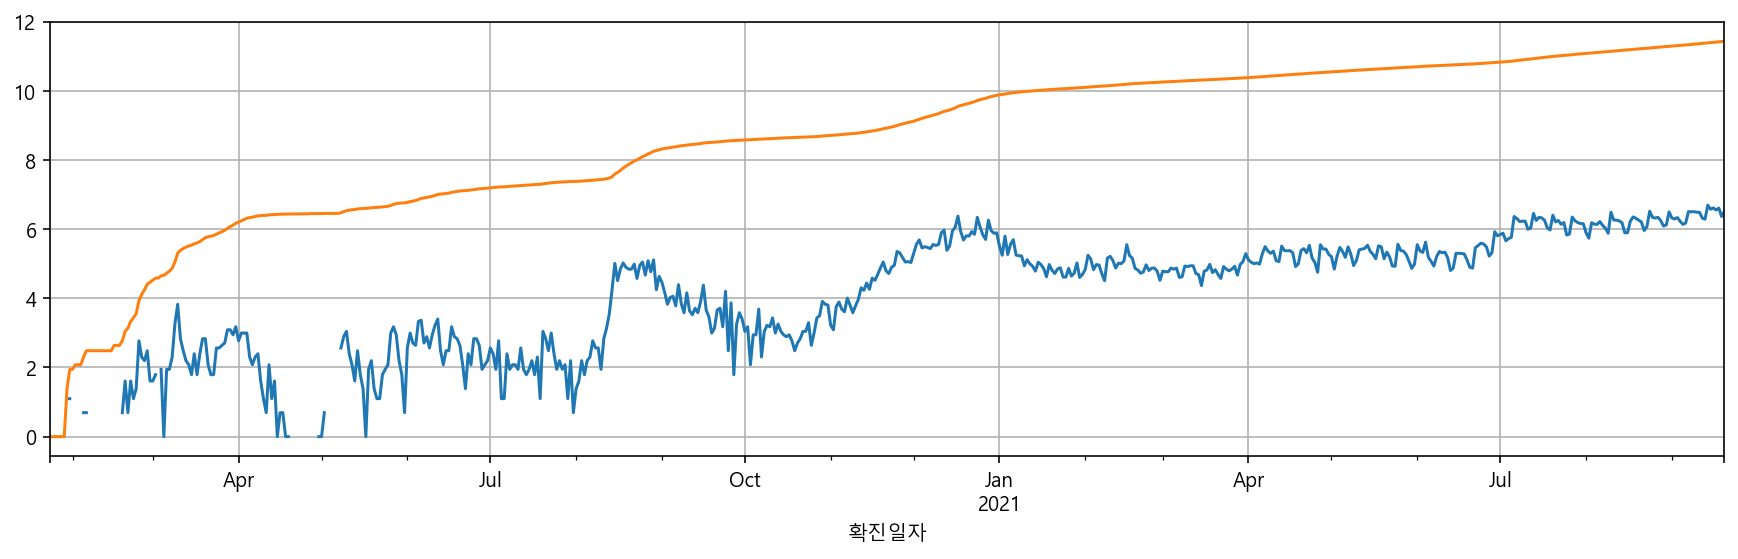

In [90]:
np.log(cum_day["확진수"]).plot(figsize=(15,4))
np.log(cum_day["누적확진"]).plot()
plt.grid(True)

In [92]:
all_days.to_csv("cap_day.csv")

In [93]:
all_days

,확진일자,확진수,누적확진
0,2020-01-24,1.0,1.0
1,2020-01-25,0.0,1.0
2,2020-01-26,0.0,1.0
3,2020-01-27,0.0,1.0
4,2020-01-28,0.0,1.0
...,...,...,...
601,2021-09-16,746.0,89828.0
602,2021-09-17,703.0,90531.0
603,2021-09-18,742.0,91273.0
604,2021-09-19,583.0,91856.0
